In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
df=pd.read_csv("Student_performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [46]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [47]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [48]:
df.shape

(10000, 6)

In [49]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [50]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

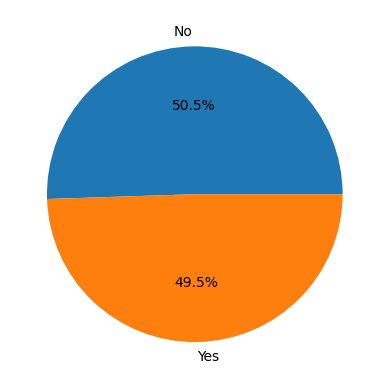

In [51]:
plt.pie(df['Extracurricular Activities'].value_counts(),labels=df['Extracurricular Activities'].value_counts().index,autopct="%1.1f%%")
plt.legend

In [52]:
df.corr(numeric_only=True)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<Axes: >

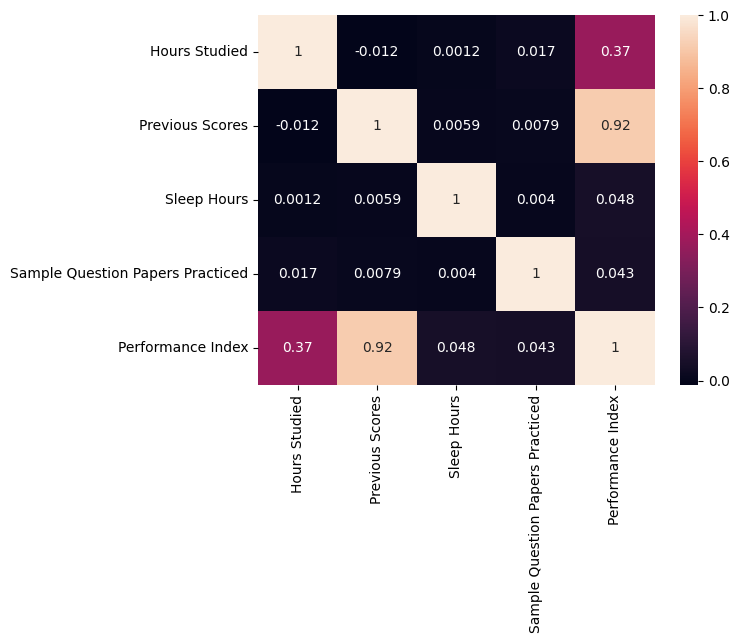

In [53]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [54]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

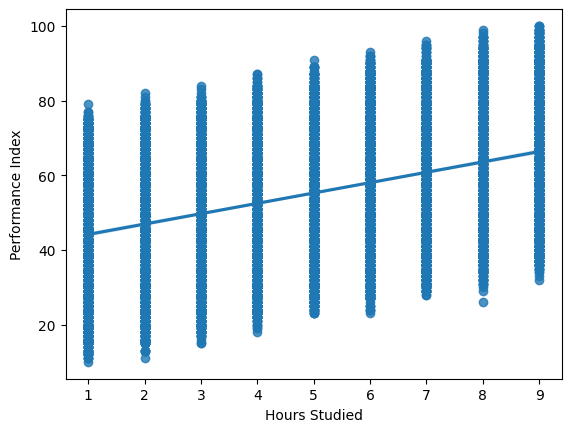

In [55]:
sns.regplot(x=df['Hours Studied'],y=y)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

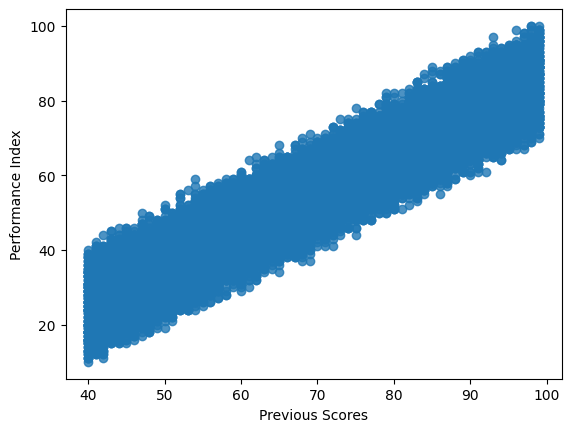

In [56]:
sns.regplot(x=df['Previous Scores'],y=y)

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

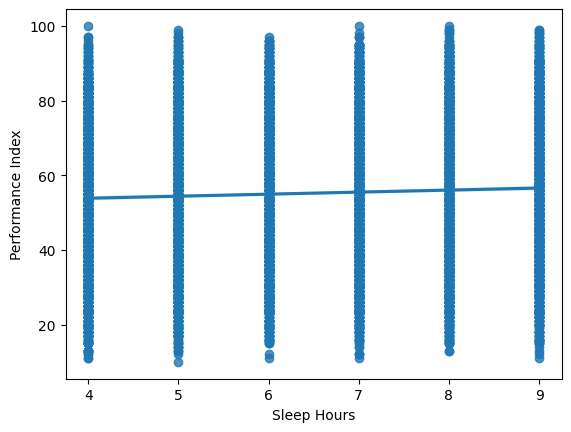

In [57]:
sns.regplot(x=df['Sleep Hours'],y=y)

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

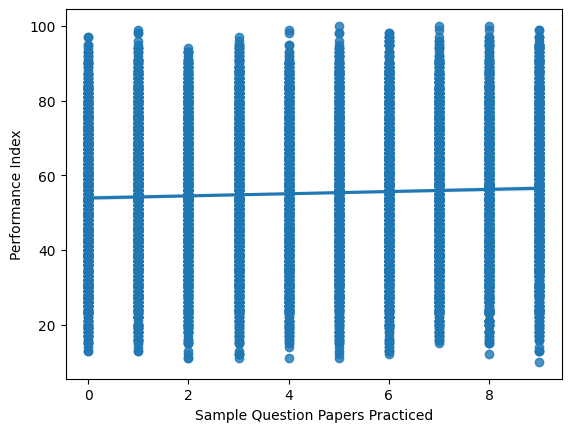

In [58]:
sns.regplot(x=df['Sample Question Papers Practiced'],y=y)

In [59]:
#encoding
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
x['Extracurricular Activities']=lab.fit_transform(x['Extracurricular Activities'])
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from sklearn.svm import SVR
sv=SVR()
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score




In [62]:
lst=[lr,dt,rf,sv,gb]
for i in lst:
    print("model name is:",i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
    print("mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test,y_pred))
    print("mean_squared_error:",mean_squared_error(y_test,y_pred))
    print("r2_score:",r2_score(y_test,y_pred))
    print("*"*30)



model name is: LinearRegression()
mean_absolute_error: 1.6173174221523658
mean_absolute_percentage_error: 0.03423948017893244
mean_squared_error: 4.212998016862824
r2_score: 0.9884110852416123
******************************
model name is: DecisionTreeRegressor()
mean_absolute_error: 2.3575
mean_absolute_percentage_error: 0.04996086843674405
mean_squared_error: 8.97326851851852
r2_score: 0.9753167593364614
******************************
model name is: RandomForestRegressor()
mean_absolute_error: 1.8545133505291005
mean_absolute_percentage_error: 0.03954254194741757
mean_squared_error: 5.496348790038397
r2_score: 0.984880904914939
******************************
model name is: SVR()
mean_absolute_error: 1.9047767681084398
mean_absolute_percentage_error: 0.04150466413450115
mean_squared_error: 5.696682118085308
r2_score: 0.9843298375152613
******************************
model name is: GradientBoostingRegressor()
mean_absolute_error: 1.6945597602332036
mean_absolute_percentage_error: 0.0357

In [63]:
import joblib
joblib.dump(lr,"performance_model.pkl)")
print("model saved ")

model saved 


In [64]:
x.dtypes

Hours Studied                       int64
Previous Scores                     int64
Extracurricular Activities          int64
Sleep Hours                         int64
Sample Question Papers Practiced    int64
dtype: object

In [65]:
def predict_performance():
    Hours_Studied=int(input("hours studied"))
    Previous_Scores=int(input("Previous Scores"))
    Extracurricular_Activities=input("Extracurricular Activities(yes/no)").lower()
    Sleep_Hours=int(input("Sleep Hours"))
    Sample_Question_Papers_Practiced=int(input("Sample Question Papers Practiced"))
    
    Extracurricular_Activities=1 if Extracurricular_Activities=="yes" else 0

    new_df=pd.DataFrame({
        "Hours Studied":[Hours_Studied],
        "Previous Scores":[Previous_Scores],
        "Extracurricular Activities":[Extracurricular_Activities],
        "Sleep Hours":[Sleep_Hours],
        "Sample Question Papers Practiced":[Sample_Question_Papers_Practiced]
    })
     
    model=joblib.load("performance_model.pkl)")
    predicted=model.predict(new_df)
    predicted_performance=max(predicted[0],0)
    print(predicted_performance)
predict_performance()    
    




32.21741859520378
